# Librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets
from ipywidgets import interact

# Montar Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Funciones

In [ ]:
def snell(n1, n2, theta1):
    theta2 = np.arcsin(n1*np.sin(theta1)/n2)
    return theta2


def registro(lambda_registro, theta_ref, theta_obj, n_material):
    theta_ref_material = snell(n_aire, n_material, theta_ref) #Define el ángulo del haz de referencia en el material
    theta_obj_material = snell(n_aire, n_material, theta_obj) #Define el ángulo del haz objeto en el material
    beta = 2*np.pi*n_material/lambda_registro #Define el parámetro beta de registro (constante de propagación)
    Kx = beta*(np.sin(theta_ref_material+np.pi) - np.sin(theta_obj_material)) #Define la componente x del vector de red
    Kz = beta*(np.cos(theta_ref_material+np.pi) - np.cos(theta_obj_material)) #Define la componente z del vector de red
    K = np.sqrt(Kx**2+Kz**2) #Define el módulo del vector de red
    Lambda = 2*np.pi/K #Define el periodo de la red
    phi = np.arctan(Kx/Kz) #Define el ángulo de inclinación de los planos de Bragg
    return Lambda, phi


def kogelnik(lambda_reconstruccion, theta_rec, n_material, Lambda, phi, n1, alpha1, alpha, d):
    theta_rec_material = snell(n_aire, n_vidrio, theta_rec) #Define el ángulo del haz de reconstrucción en el material
    K = 2*np.pi/Lambda #Define el módulo del vector de red
    beta = 2*np.pi*n_material/lambda_reconstruccion #Define el parámetro beta de reconstrucción (constante de propagación)
    cr = np.cos(theta_rec_material) #Define el parámetro cr
    cs = np.cos(theta_rec_material) - K*np.cos(phi)/beta #Define el parámetro cs
    depashing = K*np.cos(phi-theta_rec_material) - K**2*lambda_reconstruccion/(4*np.pi*n_material) #Define el parámetro de depashing
    coupling = np.pi*n1/lambda_reconstruccion - 1j*alpha1/2 #Define la constante de acoplamiento
    gamma1 = -0.5*(alpha/cr + alpha/cs + 1j*depashing/cs) + 0.5*np.sqrt((alpha/cr - alpha/cs - 1j*depashing/cs)**2 - 4*coupling**2/(cr*cs)) #Define la constante gamma1
    gamma2 = -0.5*(alpha/cr + alpha/cs + 1j*depashing/cs) - 0.5*np.sqrt((alpha/cr - alpha/cs - 1j*depashing/cs)**2 - 4*coupling**2/(cr*cs)) #Define la constante gamma2
    S = -1j*coupling/(alpha + 1j*depashing + cs*((gamma1*np.exp(gamma2*d) - gamma2*np.exp(gamma1*d))/(np.exp(gamma2*d) - np.exp(gamma1*d))))
    eta = np.abs(cs)*np.abs(S)**2/cr
    return eta

def readTXTLabView(name):
  file = open(name, "r")
  i = 0
  for line in file:
      A = file.readlines()
      i+=1
  for i in range(len(A)):
      A[i] = A[i].replace('\n'," ")
      A[i] = A[i].replace('\t'," ")
      A[i] = A[i].split()
  Datos = np.empty((len(A)-7,4))
  for i in range(3,len(A)-4):
      for j in range(4):
          Datos[i-3][j] = float(A[i][j])
  file.close()
  degree, power = Datos[:,2], Datos[:,3]*1e6

  return degree, power

# Constantes

In [ ]:
n_aire = 1 #Define el índice de refracción del aire
n_vidrio = 1.5 #Define el índice de refracción del vidrio
n_material = 1.505 #Define el índice de refracción del material
lambda_verde = 0.523 #Define la longitd de onda de registro, corresponde al verde
lambda_azul = 0.473 #Define la longitd de onda de reconstrucción, corresponde al azul
alpha1 = 0 #Define la amplitud de la modulación espacial de la constante de absorción
mu = 1 #Define la permeabilidad del medio (creo que puede ponerse la del vacio)
c = 1 #Define la velocidad de la luz en el vacío
sigma0 = 0 #Conductividad media
e0 = 1 #Constante dieléctrica media
alpha = mu*c*sigma0/(2*e0**0.5) #Define la constante de absorción media

# Importar datos experimentales

## Seleccionar carpeta

In [ ]:
path = '/content/drive/Othercomputers/Mi PC/Universidad/4º Cuarto/TFG/Datos'
lista_nombres = os.listdir(path)
namecarpeta = widgets.Dropdown(options=lista_nombres)
print('Selecciona la carpeta 1')
display(namecarpeta)

path2 = '/content/drive/Othercomputers/Mi PC/Universidad/4º Cuarto/TFG/Datos'
lista_nombres2 = os.listdir(path2)
namecarpeta2 = widgets.Dropdown(options=lista_nombres2)
print('Selecciona la carpeta 2')
display(namecarpeta2)

Selecciona la carpeta 1


Dropdown(options=('15-02', '29-02', '07-03', 'Espectofotómetro', '16-05', '17-05', 'Espectofotómetro2'), val…

Selecciona la carpeta 2


Dropdown(options=('15-02', '29-02', '07-03', 'Espectofotómetro', '16-05', '17-05', 'Espectofotómetro2'), val…

## Seleccionar archivos

### Seleccionar archivo

In [ ]:
path = '/content/drive/Othercomputers/Mi PC/Universidad/4º Cuarto/TFG/Datos/' + namecarpeta.value + '/'
lista_nombres = os.listdir(path)
name = widgets.Dropdown(options=lista_nombres)
print('Selecciona el archivo 1')
display(name)

path2 = '/content/drive/Othercomputers/Mi PC/Universidad/4º Cuarto/TFG/Datos/' + namecarpeta2.value + '/'
lista_nombres2 = os.listdir(path2)
name2 = widgets.Dropdown(options=lista_nombres2)
print('Selecciona el archivo 2')
display(name2)

Selecciona el archivo 1


Dropdown(options=('scan_Prueba_a-9.txt', 'scan_Prueba_a-19.txt', 'scan_Prueba_a19.txt', 'scan_hdplc_ref_473_a-…

Selecciona el archivo 2


Dropdown(options=('scan_hpdlc_532_a29.txt', 'scan_Bayfol_532_15s_a-29.txt', 'scan_Bayfol_532_15s_a-31.txt', 's…

### Seleccionar archivo de referencia

In [ ]:
path = '/content/drive/Othercomputers/Mi PC/Universidad/4º Cuarto/TFG/Datos/' + namecarpeta.value + '/'
lista_nombres = os.listdir(path)
name_ref = widgets.Dropdown(options=lista_nombres)
print('Selecciona el archivo  de referencia 1')
display(name_ref)

path2 = '/content/drive/Othercomputers/Mi PC/Universidad/4º Cuarto/TFG/Datos/' + namecarpeta2.value + '/'
lista_nombres = os.listdir(path2)
name_ref2 = widgets.Dropdown(options=lista_nombres2)
print('Selecciona el archivo de referencia 2')
display(name_ref2)

Selecciona el archivo  de referencia 1


Dropdown(options=('scan_Prueba_a-9.txt', 'scan_Prueba_a-19.txt', 'scan_Prueba_a19.txt', 'scan_hdplc_ref_473_a-…

Selecciona el archivo de referencia 2


Dropdown(options=('scan_hpdlc_532_a29.txt', 'scan_Bayfol_532_15s_a-29.txt', 'scan_Bayfol_532_15s_a-31.txt', 's…

# Leer archivo

In [ ]:
file_name = '/content/drive/Othercomputers/Mi PC/Universidad/4º Cuarto/TFG/Datos/' + namecarpeta.value + '/' + name.value
degree, power = readTXTLabView(file_name)
file_name_ref = '/content/drive/Othercomputers/Mi PC/Universidad/4º Cuarto/TFG/Datos/' + namecarpeta.value + '/' + name_ref.value
degree_ref, power_ref = readTXTLabView(file_name_ref)
power_ref_mean = np.mean(power_ref)
degree_final = degree
power_final = power/power.max()
rendimiento = np.max(power_final)-np.min(power_final)
print('rendimiento = ' + str(rendimiento))

file_name2 = '/content/drive/Othercomputers/Mi PC/Universidad/4º Cuarto/TFG/Datos/' + namecarpeta2.value + '/' + name2.value
degree2, power2 = readTXTLabView(file_name2)
file_name_ref2 = '/content/drive/Othercomputers/Mi PC/Universidad/4º Cuarto/TFG/Datos/' + namecarpeta2.value + '/' + name_ref2.value
degree_ref2, power_ref2 = readTXTLabView(file_name_ref2)
power_ref_mean2 = np.mean(power_ref2)
degree_final2 = degree2
power_final2 = np.flip(power2/power2.max())
rendimiento2 = np.max(power_final2[30:len(degree_final2)])-np.min(power_final2[30:len(degree_final2)])
print('rendimiento_2 = ' + str(rendimiento2))

rendimiento = 0.1317023445463812
rendimiento_2 = 0.13987591652566267


# Parámetros y gráfica

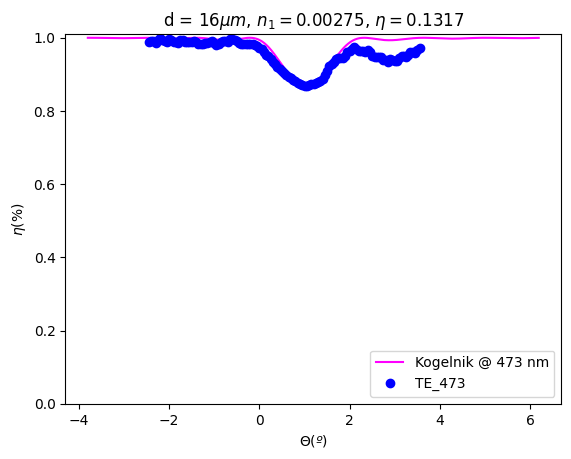

In [ ]:
theta_ref = 30*np.pi/180 #Define el ángulo de indicencia del haz de referencia con el vidrio
theta_obj = 60*np.pi/180#Define el ángulo de indicencia del haz objeto con el vidrio
n1 = 0.00275 #Define la amplitud de la modulación espacial del índice de refracción
d = 16 #Define el espesor del material
Lambda, phi = registro(lambda_verde, theta_ref, theta_obj, n_material)
thetas = np.arange(-3.5, 6.5, 0.01)
plt.figure()
#plt.plot(thetas, kogelnik(lambda_azul, thetas*np.pi/180, n_material, Lambda, phi, n1, alpha1, alpha, d), 'red', label = 'DE')
plt.plot(thetas-0.3, 1-kogelnik(lambda_azul, thetas*np.pi/180, n_material, Lambda, phi, n1, alpha1, alpha, d), color = 'fuchsia', label = 'Kogelnik @ 473 nm')
plt.plot(degree_final+0.55, (power_final), 'o', label = 'TE_473', color = 'blue')
plt.ylim(0, 1.01)

plt.xlabel('$\Theta (º)$')
plt.ylabel('$\eta (\%)$')
plt.title('d = ' + str(d) + '$\mu m$' + ', ' + '$n_1 =$' + str(n1) + ', ' + '$\eta = $' + str(rendimiento.round(4)))
plt.legend(loc = 'lower right')
plt.show()
#scipy optimizacion curv

# Parámetros y gráfica 2

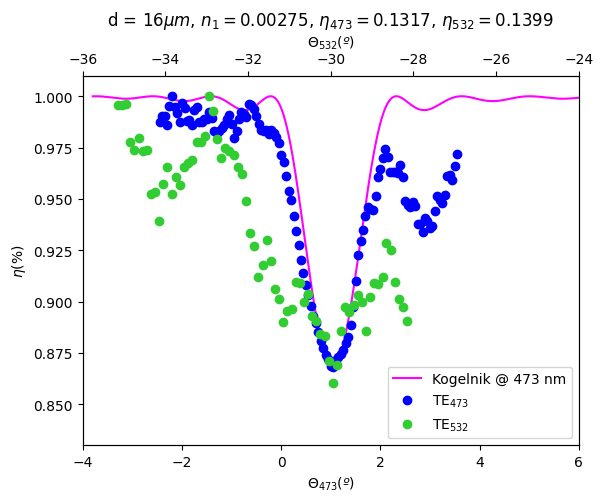

In [ ]:
theta_ref = 30*np.pi/180 #Define el ángulo de indicencia del haz de referencia con el vidrio
theta_obj = 60*np.pi/180#Define el ángulo de indicencia del haz objeto con el vidrio
n1 = 0.00275 #Define la amplitud de la modulación espacial del índice de refracción
d = 16 #Define el espesor del material
Lambda, phi = registro(lambda_verde, theta_ref, theta_obj, n_material)
thetas = np.arange(-3.5, 6.5, 0.01)

fig, axes = plt.subplots()
line1, = axes.plot(thetas-0.3, 1-kogelnik(lambda_azul, thetas*np.pi/180, n_material, Lambda, phi, n1, alpha1, alpha, d), color = 'fuchsia', label = 'Kogelnik @ 473 nm')
line2, = axes.plot(degree_final+0.55, power_final, 'o', label = 'TE$_{473}$', color = 'blue')
axes.set_xlabel('$\Theta_{473} (º)$')
axes.set_ylabel('$\eta (\%)$')
axes.set_xlim(-4, 6)

twin_axes = axes.twiny()
line3, = twin_axes.plot(-degree_final2[30:len(degree_final2)]-0.15, power_final2[30:len(degree_final2)], 'o', label = 'TE$_{532}$', color = 'limegreen')
twin_axes.set_xlabel('$\Theta_{532} (º)$')
twin_axes.set_xlim(-36, -24)

plt.title('d = ' + str(d) + '$\mu m$' + ', ' + '$n_1 =$' + str(n1) + ', ' + '$\eta_{473} = $' + str(rendimiento.round(4))+ ', ' + '$\eta_{532} = $' + str(rendimiento2.round(4)))
lines = [line1, line2, line3]
labels = [line.get_label() for line in lines]
axes.legend(lines, labels, loc='lower right')
axes.set_ylim(0.83, 1.01)
plt.show()
#scipy optimizacion curv.